# Precessing Vortex Core (Part 1)

Precessing vortex core (PVC) is one of the distinct dynamics in confined turbulent swirling flows {cite}`f-Gupta:84`, often encountered in swirl-stabilized gas turbine combustors {cite}`f-Syred:74`. Check out {cite}`f-Syred:06` for a deep dive in the technical details of PVC. Here we will just focus on how to synthesize a 2-D representation of PVC, as is usually captured in the experiment by a standard stereo-PIV. We will be using `matplotlib` extensively to plot vector fields and to create a GIF animation of the vortex motion.

```{note}
The approach adopted here is actually a reverse engineering of PCA of an experimentally observed PVC. See {cite}`f-Stoehr:11` for an easy-to-follow introduction to PCA (often referred to as POD in the field of fluid dynamics) and its applications to analyzing PVC.
```

## Create stationary modes

In a 2-D cut plane (such as in planar laser measurement techniques), the 3-D helical structure of PVC is represented as "zigzagging" vortices. In general, to create motion of traveling vortices, at least two stationary "modes" are needed as dictated by:

$$
\boldsymbol{v}(x,t)=e^{-iwt}\boldsymbol{\Phi}(x)=\cos wt\cdot\Re(\boldsymbol{\Phi}) + \sin wt\cdot\Im(\boldsymbol{\Phi})
$$ (travel_wave)

So let's start by creating the two (real) modes $\Re(\boldsymbol{\Phi})$ and $\Im(\boldsymbol{\Phi})$. We start by defining a function that creates a Gaussian shape inside a rectangle (to achieve soft edges). This may sound far-fetched but bear with me for just a moment.


In [2]:
import numpy as np

def phantomGaussian(size, fwhm=3, center=None, scale=1, offset_x=0):
    """Create a Gaussian shape inside a rectangle"""
    x = np.arange(0, size, 1, float)
    R = size // 2
    y = x[:R, np.newaxis]

    if center is None:
        x0 = y0 = R
    else:
        x0 = center[0]
        y0 = center[1]
    output = np.exp(-4*np.log(2) * ((x-x0/scale-offset_x)**2 + (y-y0/scale)**2) / (fwhm/scale)**2)

    return output

Let's see how this function works:

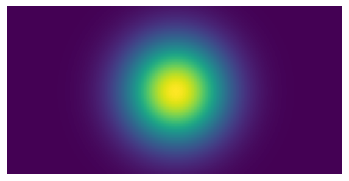

In [16]:
import matplotlib.pyplot as plt

plt.imshow(phantomGaussian(120, 30, center=[60, 30]))
plt.axis('off')
plt.show()

Now we can use this function to create the two stationary modes by combining multiple Gaussians inside the rectangle confinement:

In [20]:
# HIDE CODE
def pvc_1(size=120, R=60, fac_x=0.951662, fac_y=0.9222):
    """Create a precessing vortex core with spatial shift"""
    
    v_x_settings = [[-0.7, 35, 0, 0],
                    [-0.4, 20, 30, -2], [-0.4, 20, -30, -2],
                    [1.1, 32, 26, 28], [1.1, 32, -26, 28],
                    [0.4, 18, 48, 28], [0.4, 18, -48, 28],
                    [-0.6, 30, 50, 54], [-0.8, 30, 30, 48], [-0.6, 30, -50, 54], [-0.8, 30, -30, 48]]
    v_x_settings = np.array(v_x_settings)
    v_x_settings[:,2] = v_x_settings[:,2]*fac_x
    v_x_settings[:,3] = v_x_settings[:,3]*fac_x
    v_x = np.zeros([R, size])
    for i in v_x_settings:
        v_x += i[0]*phantomGaussian(size, fwhm=i[1], center=[i[2]+R, i[3]])

    v_y_settings = [[1., 30, 6, 0], [-1., 30, -6, 0], [0.5, 15, 3, 0], [-0.5, 15, -3, 0],
                    [-0.3, 10, 30, 2], [0.3, 10, -30, 2], [-0.5, 10, 30, 12], [0.5, 10, -30, 12],
                    [-1, 30, 25, 40], [1, 30, -25, 40],
                    [0.8, 35, 40, 70], [-0.8, 35, -40, 70],
                    [0.7, 10, 46, 35], [-0.7, 10, -46, 35],
                    [0.3, 10, 43, 20], [-0.3, 10, -43, 20],
                    [-0.1, 30, 60, 10], [0.1, 30, -60, 10]]
    v_y_settings = np.array(v_y_settings)
    v_y_settings[:,2] = v_y_settings[:,2]*fac_y
    v_y_settings[:,3] = v_y_settings[:,3]*fac_y
    v_y = np.zeros([R, size])
    for i in v_y_settings:
        v_y += i[0]*phantomGaussian(size, fwhm=i[1], center=[i[2]+R, i[3]])
    return np.array([v_x*1.078, v_y])

def pvc_2(size=120, R=60, fac_x=1, fac_y=1):
    """Create a precessing vortex core
    """
    v_x_settings = [[0.8, 15, 0, -7],
                    [0.4, 20, 38, -8], [0.4, 20, -38, -8],
                    [-0.7, 35, 17, 12], [-0.7, 35, -17, 12],
                    [-0.6, 20, 36, 12], [-0.6, 20, -36, 12],
                    [1.1, 32, 30, 38], [1.1, 32, -30, 38],
                    [-1, 30, 52, 70], [-1, 30, 34, 70], [-1, 30, -52, 70], [-1, 30, -34, 70]]
    v_x_settings = np.array(v_x_settings)
    v_x_settings[:,2] = v_x_settings[:,2]*fac_x
    v_x_settings[:,3] = v_x_settings[:,3]*fac_x
    v_x = np.zeros([R, size])
    for i in v_x_settings:
        v_x += i[0]*phantomGaussian(size, fwhm=i[1], center=[i[2]+R, i[3]])

    v_y_settings = [[1, 30, 18, 22], [-1, 30, -18, 22],
                    [-0.3, 10, 5, 0], [0.3, 10, -5, 0],
                    [-0.8, 15, 36, 18], [0.8, 15, -36, 18], [-0.6, 15, 32, 2], [0.6, 15, -32, 2],
                    [0.1, 25, 40, -2], [-0.1, 25, -40, -2],
                    [-1, 30, 30, 50], [1, 30, -30, 50],
                    [1, 35, 53, 64], [-1, 35, -53, 64],
                    [-0.3, 30, 75, 20], [0.3, 30, -75, 20]]
    v_y_settings = np.array(v_y_settings)
    v_y_settings[:,2] = v_y_settings[:,2]*fac_y
    v_y_settings[:,3] = v_y_settings[:,3]*fac_y
    v_y = np.zeros([R, size])
    for i in v_y_settings:
        v_y += i[0]*phantomGaussian(size, fwhm=i[1], center=[i[2]+R, i[3]])
    return np.array([v_x, v_y])

There is a lot of "jerry-rigging" going on in the code above so it is hidden to preserve the aesthetics of this otherwise clean page. Basically, our next goal is to create a 2-D vector field that has two components, $v_x$ and $v_y$, corresponding to the axial and radial directions of the velocity vectors. I had to combine a lot of Gaussian shapes here to mimic the natural look of PVC observed in experiments in gas turbine combustors. I put in additional fudge factors in the first mode `pvc_1()` such that it is "almost" orthogonal to the second mode `pvc_2()` (i.e., the element-wise product of $v_x$ and $v_y$ sums to zero). You can play with all the fudge factors to see if you can get a more "orthogonal" combination than I did.

```{attention}
In swirl flows where PVC can be found, there is usually a strong out-of-plane velocity component $v_z$. It is omitted here to simplify the problem. 
```

First we will just check the spatial distributions of the two vector components of `pvc_1()`:

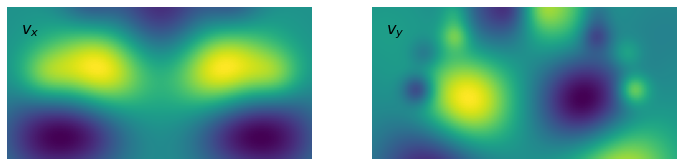

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(pvc_1()[0,:])
plt.text(5, 10, r"$v_x$", fontsize=16)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(pvc_1()[1,:])
plt.text(5, 10, r"$v_y$", fontsize=16)
plt.axis('off')
plt.show()

We can make more sense of this mode by presenting it in a vector plot:

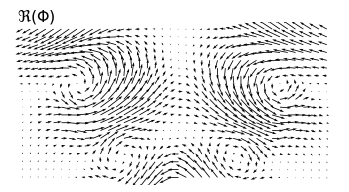

In [93]:
# define the grid
x = np.arange(-2.9, 3.1, 0.05)
y = np.arange(0, 3, 0.05)
X, Y = np.meshgrid(x, y)

# vector plot
_, ax = plt.subplots(1, 1, figsize=(6, 6))
v_array = pvc_1()
v_x = v_array[0, :]
v_y = v_array[1, :]
vskip = 3
ax.quiver(X[::vskip, ::vskip], Y[::vskip, ::vskip], v_x[::vskip, ::vskip],
          v_y[::vskip, ::vskip], units='width', scale=20)
ax.set_aspect('1')
ax.text(-3, 3, r"$\Re(\Phi)$", fontsize=16)
plt.axis('off')
plt.show()


Similarly, we can plot the second mode `pvc_2()`:

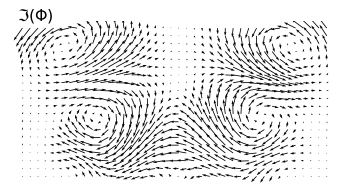

In [94]:
# NO CODE
# define the grid
x = np.arange(-2.9, 3.1, 0.05)
y = np.arange(0, 3, 0.05)
X, Y = np.meshgrid(x, y)

# vector plot
_, ax = plt.subplots(1, 1, figsize=(6, 6))
v_array = pvc_2()
v_x = v_array[0, :]
v_y = v_array[1, :]
vskip = 3
ax.quiver(X[::vskip, ::vskip], Y[::vskip, ::vskip], v_x[::vskip, ::vskip],
          v_y[::vskip, ::vskip], units='width', scale=20)
ax.set_aspect('1')
ax.text(-3, 3, r"$\Im(\Phi)$", fontsize=16)
plt.axis('off')
plt.show()

Again, I made deliberate hand-tweaks to the look of the second mode such that the vortices are spatially displaced relative to the first mode (actually by roughly a quarter of the wavelength). The purpose of this is not only to make this second mode more or less orthogonal to the first one, but also to dictate a specific pattern for the vortices.
To see this flow pattern in motion, we will need to come back to the Eq. [](travel_wave). Here we assume the motion is completely harmonic and its frequency is controlled by $w$. If it is not immediately clear that the two stationary modes are shifted in time by a quarter of the period (or by 90° phase angle), we can simply plot out their temporal evolutions as determined by $\cos wt$ and $\sin wt$:

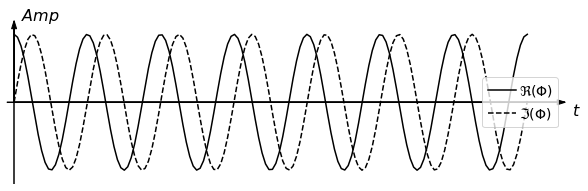

In [98]:
f=470
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
t = np.arange(150)*1e-4
ax.plot(t, np.cos(2*np.pi*f*t), 'k', label=r'$\Re(\Phi)$')
ax.plot(t, np.sin(2*np.pi*f*t), 'k--', label=r'$\Im(\Phi)$')
ax.legend(loc=0, handletextpad=0.2, fontsize=14)
ax.axis('off')
ax.hlines(0, 0, 1.6e-2, 'k')
ax.annotate('', xy=(1.6e-2, 0), xytext=(-2e-4, 0),
            arrowprops=dict(color='k', width=0.5, headlength=8, headwidth=5),
            color='k', ha='center')
ax.vlines(0, -1.2, 1.2, 'k')
ax.annotate('', xy=(0, 1.2), xytext=(0, 0),
            arrowprops=dict(color='k', width=0.5, headlength=8, headwidth=5),
            color='k', ha='center')
ax.text(1.62e-2, -0.2, r'$t$', fontsize=16)
ax.text(0.2e-3, 1.2, r'$Amp$', fontsize=16)
ax.set_ylim([-1.2, 1.2])
ax.set_xlim([-2e-4, 1.6e-2])
plt.show()

## Create PVC animation

Now we can combine the two modes we just created and visualize the PVC pattern in an animation and save it in a GIF:

```python
import matplotlib.animation as animation

f = 470 
fig = plt.figure(frameon=False, figsize=(6, 3.5))
# remove whitespace
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.set_aspect('1')
t = np.arange(8)*1/(8*f)
ims = []
for _t in t:
    v_array = pvc_1()*np.cos(2*np.pi*f*_t) + pvc_2()*np.sin(2*np.pi*f*_t)
    v_x = v_array[0, :]
    v_y = v_array[1, :]
    vskip = 3
    Q = ax.quiver(X[::vskip, ::vskip], Y[::vskip, ::vskip], v_x[::vskip, ::vskip],
                    v_y[::vskip, ::vskip], units='width', scale=20)
    plt.axis('off')
    ims.append([Q])

ani = animation.ArtistAnimation(fig, ims, interval=150/f*500, blit=True)
ani.save('pvc.gif', dpi=300, writer='imagemagick')
```

This is how the flow pattern looks like:

```{image} ../src/img/pvc.gif
:width: 350px
```

Now we have visualized the motion of the vortices, I encourage you to go back and play with the code and see if you can create other kinds of flow patterns following the same idea. Notice that on both sides of the center line the "symmetrically"-distributed vortices rotate in the same direction (either clockwise or counterclockwise). This turns out to be a signature pattern of PVC vortices and can exert a "zig-zag" motion on the flow field. To see this, we will need to add the "mean" flow field, i.e., the part that doesn't change over time. In PCA, this will usually appear as the most energetic component. In fluid dynamics, the ensemble average of a dataset is therefore often subtracted before a PCA to focus on the dynamic patterns.